In [2]:
import pandas as pd
import kaplanmeier as km
import numpy as np

In [3]:
sarc = pd.read_csv("sarcoma.csv")

myc = pd.read_csv("MYC.csv", sep="\t")
cdk = pd.read_csv("CDKN2A.csv", sep="\t")
erb = pd.read_csv("ERBB2.csv", sep="\t")
tp = pd.read_csv("TP53.csv", sep="\t")



/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
mycl = []
cdkl = []
erbl = []
tpl = []


for yd in sarc.loc[:,"id"]:
    for yyd in myc.loc[:,"biosample_id"]:
        if yd == yyd:
            if yd not in mycl:
                mycl.append(yd)
    for yyd in cdk.loc[:,"biosample_id"]:
        if yd == yyd:
            if yd not in cdkl:
                cdkl.append(yd)
    for yyd in erb.loc[:,"biosample_id"]:
        if yd == yyd:
            if yd not in erbl:
                erbl.append(yd)
    for yyd in tp.loc[:,"biosample_id"]:
        if yd == yyd:
            if yd not in tpl:
                tpl.append(yd)


In [16]:
mycsarc = pd.DataFrame(sarc.loc[sarc["id"].isin(mycl)])
cdksarc = pd.DataFrame(sarc.loc[sarc["id"].isin(cdkl)])
erbsarc = pd.DataFrame(sarc.loc[sarc["id"].isin(erbl)])
tpsarc = pd.DataFrame(sarc.loc[sarc["id"].isin(tpl)])

In [19]:
mycsarc["label"] = "MYC+"
cdksarc["label"] = "CDKN2A-"
erbsarc["label"] = "ERBB2+"
tpsarc["label"] = "TP53-"

In [21]:
täglichbrot = pd.concat([mycsarc,cdksarc,erbsarc,tpsarc])

In [55]:
täglichbrot[täglichbrot["info.followupMonths"].isna()]

,_id,cohorts.0.id,cohorts.0.label,dataUseConditions.id,dataUseConditions.label,description,externalReferences.0.id,externalReferences.0.label,histologicalDiagnosis.id,histologicalDiagnosis.label,...,externalReferences.4.description,externalReferences.4.id,externalReferences.4.label,cohorts.4.id,cohorts.4.label,info.cellLine,info.samplesource,info.seer,sex,label


In [54]:
täglichbrot = täglichbrot.drop([245])

In [56]:
mycres = km.fit(täglichbrot.loc[:,"info.followupMonths"], täglichbrot.loc[:,"info.death"], täglichbrot.loc[:,"label"])

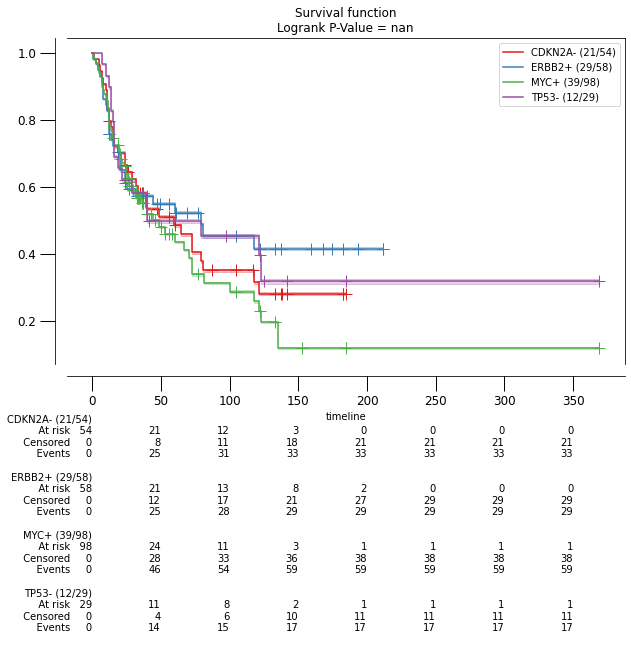

In [57]:
km.plot(mycres)